# Discovering Periodic Frequent patterns in Big Data Using PFPGrowth Algorithm

In this tutorial, we will discuss the first approach to find Periodic Frequent patterns in big data using PFPGrowth algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Periodic Frequent patterns using a single minimum support value


***

## <a id='basicApproach'>Basic approach: Executing PFPGrowth on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the PFPGrowth algorithm

In [2]:
from PAMI.periodicFrequentPattern.basic import PFPGrowth  as alg

#### Step 2: Specify the following input parameters

In [3]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'

minimumSupportCount = 100  #Users can also specify this constraint between 0 to 1.
maxmunPeriodCount = 5000
seperator = '\t'       

#### Step 3: Execute the PFPGrowth algorithm

In [4]:
obj = alg.PFPGrowth(iFile=inputFile, minSup=minimumSupportCount,maxPer=maxmunPeriodCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Periodic Frequent patterns were generated successfully using PFPGrowth algorithm 


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [5]:
obj.save(outFile='periodicFrequentPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [6]:
periodicFrequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [7]:
print('Total No of patterns: ' + str(len(periodicFrequentPatternsDF)))

Total No of patterns: 25454


##### Step 5.2: Runtime consumed by the mining algorithm

In [8]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 35.14378619194031


##### Step 5.3: Total Memory consumed by the mining algorithm

In [9]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 389988352
Memory (USS): 370917376


# Advanced Tutorial on Implementing PFPGrowth Algorithm

In this tutorial, we will discuss the second approaches to find Periodic Frequent patterns in big data using PFPGrowth algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Periodic Frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the Periodic Frequent Puttern Growth (PFPGrowth) algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the PFPGrowth algorithm and pandas data frame

In [10]:
from PAMI.periodicFrequentPattern.basic import PFPGrowth  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [11]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
seperator = '\t'
maxmunPeriodCount = 5000
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup','maxPer', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PFPGrowth algorithm

#### Step 3: Execute the PFPGrowth algorithm using a for loop

In [12]:
algorithm = 'PFPGrowth'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.PFPGrowth('https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv', minSup=minSupCount,maxPer=maxmunPeriodCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount,maxmunPeriodCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Periodic Frequent patterns were generated successfully using PFPGrowth algorithm 
Periodic Frequent patterns were generated successfully using PFPGrowth algorithm 
Periodic Frequent patterns were generated successfully using PFPGrowth algorithm 
Periodic Frequent patterns were generated successfully using PFPGrowth algorithm 
Periodic Frequent patterns were generated successfully using PFPGrowth algorithm 


In [13]:
print(result)

   algorithm  minSup  maxPer  patterns     runtime     memory
0  PFPGrowth     100    5000     25454   58.634604  259735552
1  PFPGrowth     150    5000     18976  103.938058  133611520
2  PFPGrowth     200    5000     13231  143.792958  269926400
3  PFPGrowth     250    5000      7673   58.075725  365576192
4  PFPGrowth     300    5000      4529   64.943558  308183040


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [14]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

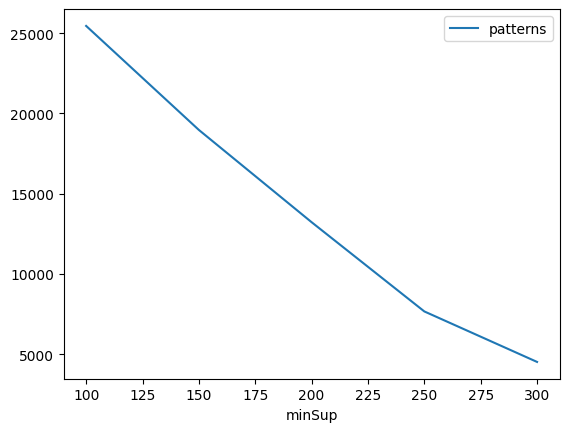

Graph for No Of Patterns is successfully generated!


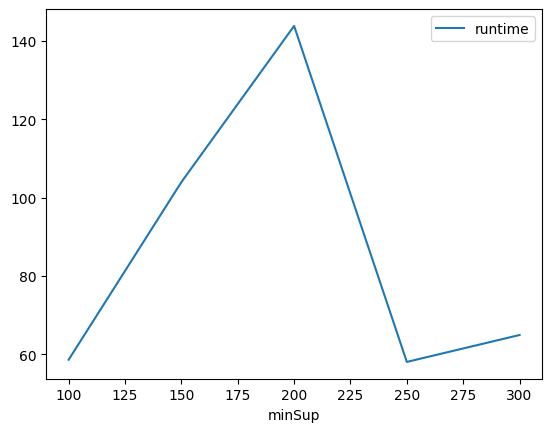

Graph for Runtime taken is successfully generated!


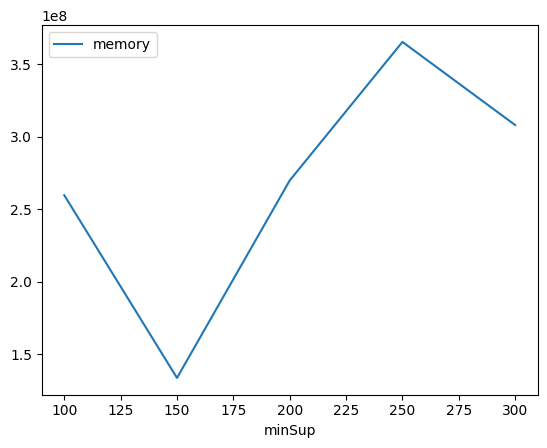

Graph for memory consumption is successfully generated!


In [15]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [16]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
